In [1]:
#Package dependencies: 
!pip install -- upgrade pip
!pip install imbalanced-learn
!pip install cufflinks
!pip install xgboost
!pip install missingno

  Could not find a version that satisfies the requirement upgrade (from versions: )
No matching distribution found for upgrade
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
autovizwidget 0.12.7 has requirement plotly<3.0,>=1.10.0, but you'll have plotly 3.9.0 which is incompatible.
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


autovizwidget 0.12.7 has requirement plotly<3.0,>=1.10.0, but you'll have plotly 3.9.0 which is incompatible.
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
autovizwidget 0.12.7 has requirement plotly<3.0,>=1.10.0, but you'll have plotly 3.9.0 which is incompatible.
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
autovizwidget 0.12.7 has requirement plotly<3.0,>=1.10.0, but you'll have plotly 3.9.0 which is incompatible.
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
############ Chapter 6.1: DATA UNDERSTANDING ##############

###     Includes following: 
#       1. Data import 
#       2. Overview - summary statistics & data types - 6.1.2 
#       3. Target characteristics - 6.1.3 
#       4. Correlations - 6.1.3 
#       5. Missing values - 6.1.4.1 
#       6. Plottting - 6.1.4.2 

In [3]:
### 1. Data import and general settings
import pandas as pd 
import numpy as np

from sagemaker import get_execution_role

role = get_execution_role()
bucket = 'kgml-data'
data_key='KGML_2.csv'
data_location = 's3://{}/{}'.format(bucket, data_key)
df=pd.read_csv(data_location,sep=';',decimal=",")


pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

In [4]:
### 2. Overview - summary statistics & data types 
print(df.describe())
print(df.dtypes)

                id       Target      MPostnr     AEPostnr    AntalBorn  \
count  1213.000000  1213.000000  1213.000000   502.000000  1213.000000   
mean    657.906018     0.062655  8658.608409  8223.390438     1.800495   
std     365.906205     0.242441   553.660892  1250.122818     1.392377   
min      18.000000     0.000000  2000.000000  2200.000000     0.000000   
25%     342.000000     0.000000  8700.000000  8700.000000     1.000000   
50%     661.000000     0.000000  8700.000000  8700.000000     2.000000   
75%     973.000000     0.000000  8700.000000  8700.000000     3.000000   
max    1288.000000     1.000000  9999.000000  9900.000000     9.000000   

           BPostnr       BAlder     B2Postnr      B2Alder     B3Postnr  \
count   945.000000  1213.000000   664.000000  1213.000000   293.000000   
mean   8254.041270    11.409728  8261.126506     7.352020  8334.235495   
std    1302.945937    11.151128  1352.813087    10.049411  1193.130679   
min     839.000000     0.000000   705

In [5]:
### 3. Target distribution:  

#Means across dataset for Target classes: 

def abs_diff(x, y):
    return abs(x - y)

df5 = pd.pivot_table(df, values = df.columns, columns = 'Target')

df5['Diff'] = abs_diff(df5[0], df5[1])

print(df5)

import matplotlib.pyplot as plt
pd.value_counts(df['Target']).plot.bar()
plt.title('Benefit Fraud histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
    
print(df['Target'].value_counts())

Target                                0            1        Diff
AEAdrHis                       1.217238     1.039474    0.177765
AECountSam                     4.279683     3.921053    0.358631
AEPostnr                    8238.500000  7946.769231  291.730769
AdrHis                         3.332454     3.289474    0.042980
AntalBorn                      1.801231     1.789474    0.011758
B2Alder                        7.401935     6.605263    0.796672
B2Postnr                    8254.713600  8363.897436  109.183836
B3Alder                        3.278804     2.921053    0.357751
B3Postnr                    8318.250000  8541.285714  223.035714
BAlder                        11.428320    11.131579    0.296741
BPostnr                     8259.593010  8169.137931   90.455079
CountSam                      10.716799     9.947368    0.769430
CountSkilt                     0.398417     0.289474    0.108943
IndexAar                       0.573146     0.606663    0.033517
IndexKvartal             

In [8]:
### 4. Correlations 

# Import of packages for plotting: 
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import iplot, init_notebook_mode

# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

# Correlation between variables 
df.corr() # Inspect values 

#Create Correlogram - Heatmap: 
corrs = df.corr() # We plot them visually
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
        
figure.iplot()

df.corr()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning:

invalid value encountered in reduce



,id,Target,MPostnr,AEPostnr,AntalBorn,BPostnr,BAlder,B2Postnr,B2Alder,B3Postnr,B3Alder,IndexKvartal,IndexAar,nPrivateIndtaegter,nOffentligeIndtaegter,offentligeYdelser,privateIndtaegter,KTypeKontant,KTypeUdd,KTypeIntegr,KTypeDaginstNeds,KTypeDagp,KTypePens,KTypePensKom,UDKTypeBoligsikring,UDKTypeBoligsikringFortid,UDKTypeBTilskudEnlig,UDKTypeEkstraBTilskudEnlig,UDKTypeFlerBTilskud,UDKTypeBBidragNormal,UDKTypeBYdelse,CountSkilt,Skilt,AdrHis,CountSam,AEAdrHis,AECountSam,MFAdrHis,MFCountSam,Samboende
id,1.000000,-0.026878,-0.006289,-0.032540,0.019719,-0.050751,-0.004047,-0.000888,0.013248,-0.036056,-0.012930,-0.004859,-0.016896,0.000685,0.015738,-0.014989,0.022286,0.009523,-0.028204,-0.013239,-0.032538,0.031286,-0.012263,-0.019191,-0.016893,0.037408,-0.047420,-0.046540,-0.034267,0.003228,-0.063433,0.044095,0.039929,0.055640,0.046967,0.040599,0.044250,0.025986,0.019139,0.012023
Target,-0.026878,1.000000,0.003275,-0.051767,-0.002047,-0.016672,-0.006452,0.018991,-0.019220,0.048301,-0.011389,-0.004325,0.018348,0.021353,-0.008879,-0.018735,-0.019448,-0.001500,-0.001096,0.039166,0.040348,-0.021755,-0.051009,-0.066118,0.044802,-0.035029,-0.043031,-0.049209,-0.010507,-0.002271,0.006498,-0.040757,-0.049835,-0.004080,-0.016037,-0.021372,-0.010644,-0.038187,-0.043231,-0.007426
MPostnr,-0.006289,0.003275,1.000000,0.191136,0.051397,0.091245,0.068757,0.081163,0.054372,0.108773,0.035353,0.020365,0.026819,0.007199,0.032429,-0.021143,0.008270,0.028855,0.034518,0.026577,0.023499,0.009760,0.022831,0.028529,0.015057,0.003758,0.035416,0.034682,0.003039,0.015770,0.063810,0.010295,0.005709,-0.000432,-0.031282,0.014612,-0.001230,0.048897,0.039229,0.002148
AEPostnr,-0.032540,-0.051767,0.191136,1.000000,0.051424,0.378584,-0.043471,0.292335,0.008800,0.165277,0.039204,-0.010296,-0.027414,0.082558,0.060419,-0.006242,0.102501,-0.024825,NaN,0.039097,0.015308,0.115206,0.087959,0.089281,-0.107611,0.059321,0.021261,0.019521,NaN,-0.012832,0.075815,-0.125033,-0.173905,-0.198227,-0.169296,-0.184194,-0.189585,-0.081325,-0.001233,0.017050
AntalBorn,0.019719,-0.002047,0.051397,0.051424,1.000000,-0.179154,0.629664,-0.220308,0.688672,-0.312431,0.675112,0.042433,0.037594,-0.048086,-0.012884,0.162111,0.032855,0.082396,-0.152638,-0.031101,0.072736,-0.036688,0.173047,0.161806,0.048006,0.038211,0.146043,0.147008,0.035024,0.059517,0.159136,0.305194,0.315846,-0.130437,0.045481,0.252974,0.289474,0.245508,0.306748,0.045394
BPostnr,-0.050751,-0.016672,0.091245,0.378584,-0.179154,1.000000,-0.198048,0.413244,-0.203824,0.217805,-0.158422,-0.039573,-0.039937,0.103347,0.059824,0.020995,0.122107,0.025268,0.064373,0.012999,0.095648,0.079633,-0.046861,-0.048617,0.045459,-0.004947,0.093576,0.092301,0.015771,0.049855,0.180340,-0.147067,-0.152916,-0.101725,-0.193653,-0.255894,-0.293425,-0.059416,-0.166710,0.011146
BAlder,-0.004047,-0.006452,0.068757,-0.043471,0.629664,-0.198048,1.000000,-0.248257,0.866953,-0.249381,0.656745,0.049804,0.046239,-0.065543,0.051740,0.154778,0.004612,0.091235,-0.189379,-0.072063,-0.176650,-0.006417,0.352500,0.287926,-0.057301,0.057792,-0.014923,-0.012801,-0.023369,-0.074960,-0.123436,0.338346,0.330747,-0.201512,-0.085256,0.193756,0.217474,-0.004772,0.087647,0.045330
B2Postnr,-0.000888,0.018991,0.081163,0.292335,-0.220308,0.413244,-0.248257,1.000000,-0.283046,0.357652,-0.257890,0.000152,-0.001065,0.044517,0.065052,-0.000130,0.039657,-0.003883,0.040293,0.028279,0.141281,0.031335,-0.104123,-0.105234,0.109405,0.035684,0.138022,0.136182,0.017845,0.053622,0.262797,-0.153792,-0.117238,0.033445,-0.065237,-0.042494,-0.078720,0.116268,0.041215,0.012609
B2Alder,0.013248,-0.019220,0.054372,0.008800,0.688672,-0.203824,0.866953,-0.283046,1.000000,-0.266739,0.764721,0.056009,0.046410,-0.078635,0.017120,0.141666,-0.015566,0.039560,-0.157754,-0.049078,-0.161973,-0.009498,0.320825,0.272786,-0.056821,0.058559,-0.024609,-0.022914,-0.013561,-0.061346,-0.126030,0.338116,0.325713,-0.180719,-0.043122,0.216806,0.258563,-0.027942,0.091138,0.056183
B3Postnr,-0.036056,0.048301,0.108773,0.165

id                              0
Target                          0
MPostnr                         0
MBy                             0
AEPostnr                      711
AEBy                          711
AntalBorn                       0
BPostnr                       268
BBy                           271
BAlder                          0
B2Postnr                      549
B2By                          554
B2Alder                         0
B3Postnr                      920
B3By                          921
B3Alder                         0
IndexKvartal                    0
IndexAar                        0
nPrivateIndtaegter              0
nOffentligeIndtaegter           0
offentligeYdelser               0
privateIndtaegter               0
KTypeKontant                    0
KTypeUdd                        0
KTypeIntegr                     0
KTypeDaginstNeds                0
KTypeDagp                       0
KTypePens                       0
KTypePensKom                    0
UDKTypeBoligsi

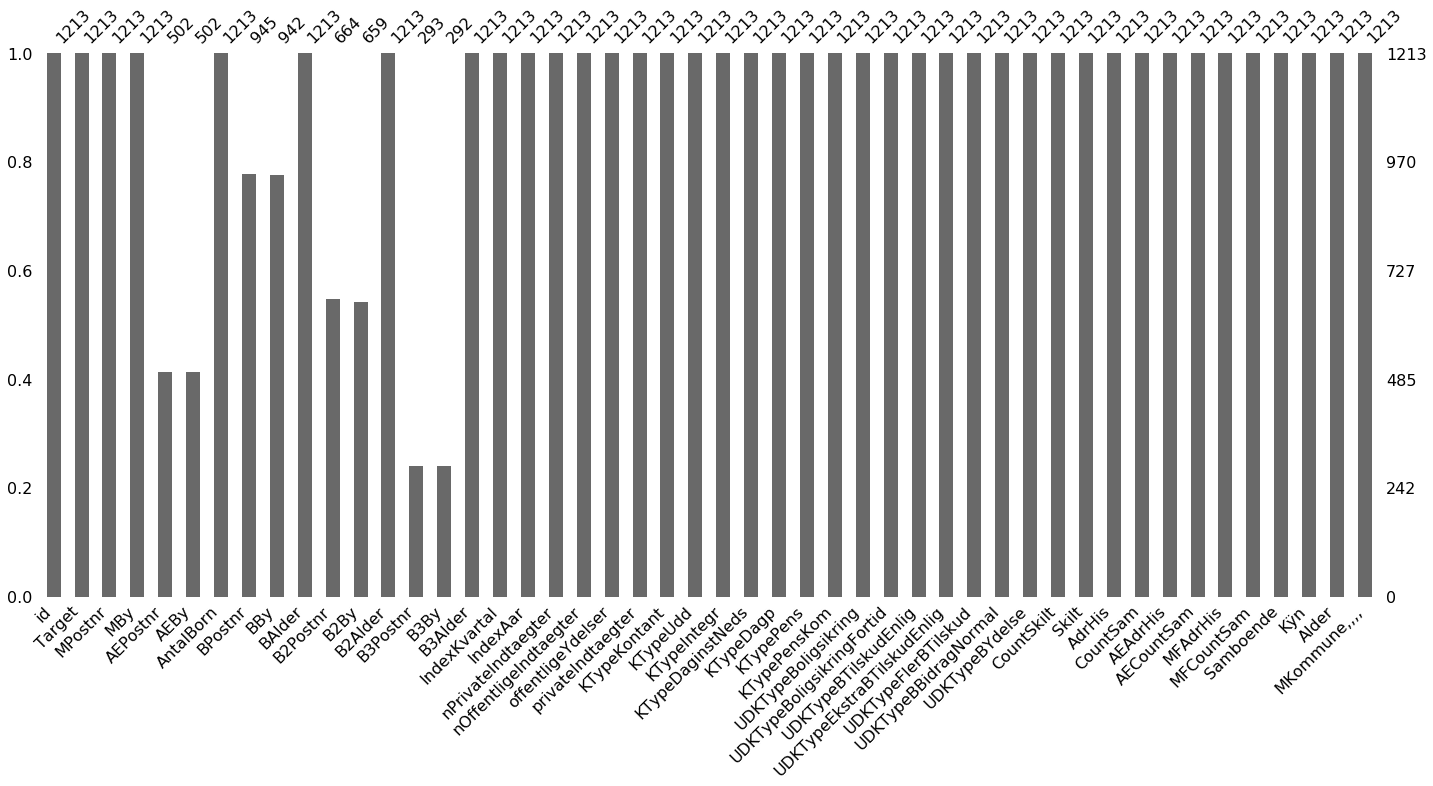

In [5]:
### 5. Missing Values: 
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
pd.options.display.max_columns = None
import missingno as msno

msno.bar(df)

print(df.isnull().sum())

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


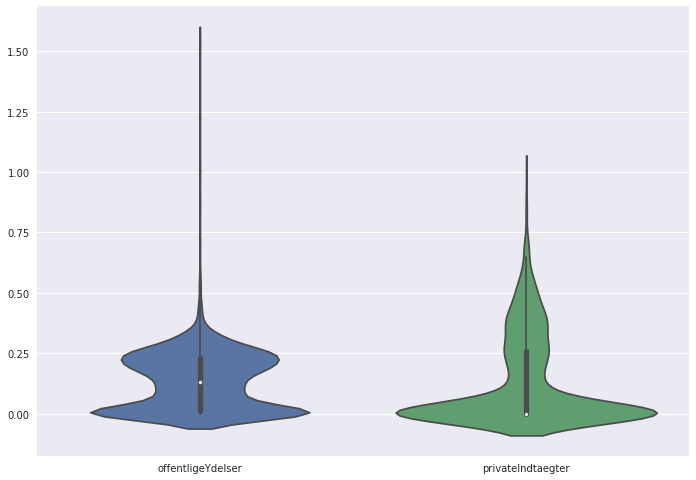

In [11]:
### 6. Plotting

# Violin Plots: 

import seaborn as sns 
df1 = df[['offentligeYdelser','privateIndtaegter']]
sns.violinplot(data=df1)
sns.set(rc={'figure.figsize':(11.7,8.27)})

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


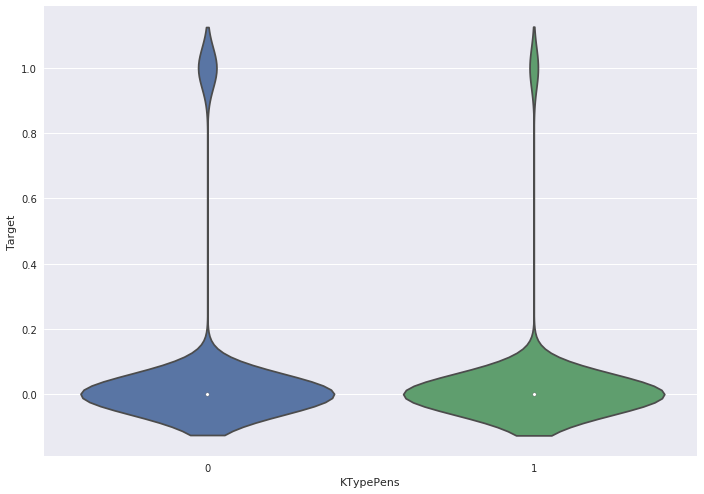

In [7]:
sns.violinplot(y = 'Target', x = 'KTypePens', data = df)
sns.set(rc={'figure.figsize':(11.7,8.27)})

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


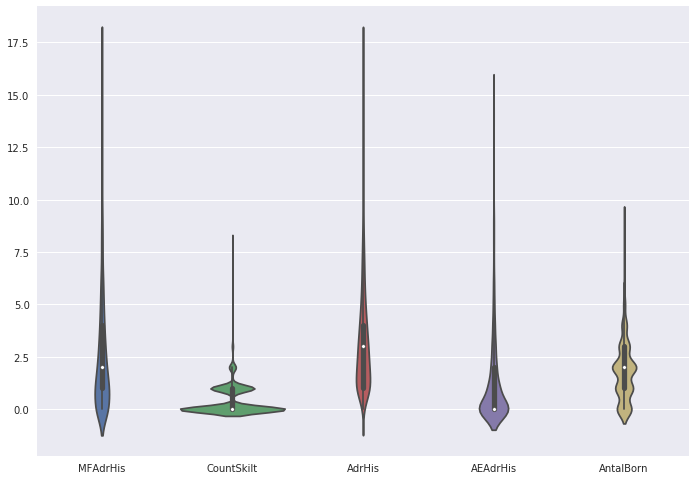

In [10]:
df1 = df[['MFAdrHis','CountSkilt','AdrHis','AEAdrHis','AntalBorn']]
sns.violinplot(data=df1)
sns.set(rc={'figure.figsize':(11.7,8.27)})

3    26
1    22
2    20
4     5
5     3
Name: Alder, dtype: int64


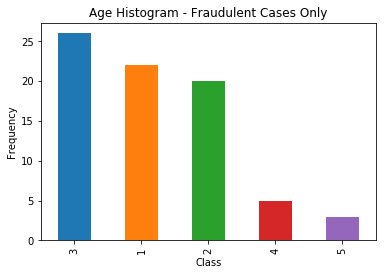

In [21]:
# Age Histogram - Fraudulent Cases Only 

df2 = df.loc[df['Target']== 1]

pd.value_counts(df2['Alder']).plot.bar()
plt.title('Age Histogram - Fraudulent Cases Only')
plt.xlabel('Class')
plt.ylabel('Frequency')  
pd.value_counts(df['Alder'])

print(df2['Alder'].value_counts())

30 til 39    360
40 til 49    351
20 til 29    258
50 til 59    159
60 til 69     57
70 til 79     11
80 til 89      8
10 til 19      4
90 til 90      4
0 til 9        1
Name: Alder, dtype: int64


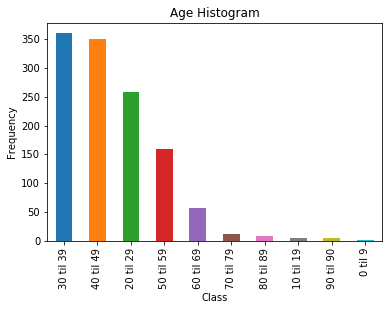

In [7]:
# Age Histogram 
pd.value_counts(df['Alder']).plot.bar()
plt.title('Age Histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')  
pd.value_counts(df['Alder'])

print(df['Alder'].value_counts())

1    44
0    32
Name: Kÿn, dtype: int64

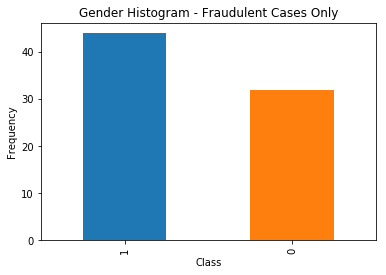

In [23]:
#Gender Histogram - Fraudulent Class Only

pd.value_counts(df2['Kÿn']).plot.bar()
plt.title('Gender Histogram - Fraudulent Cases Only')
plt.xlabel('Class')
plt.ylabel('Frequency')  
pd.value_counts(df2['Kÿn'])

Kvinde    747
Mand      466
Name: Kÿn, dtype: int64

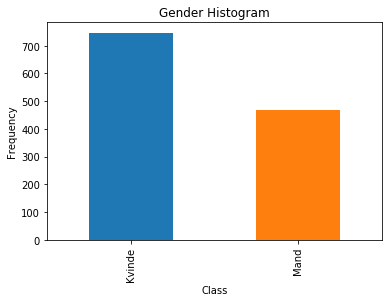

In [9]:
#Gender Histomgram

pd.value_counts(df['Kÿn']).plot.bar()
plt.title('Gender Histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')  
pd.value_counts(df['Kÿn'])

1    384
0    383
2    170
3    126
4     82
5     56
6     12
Name: CountUDK, dtype: int64

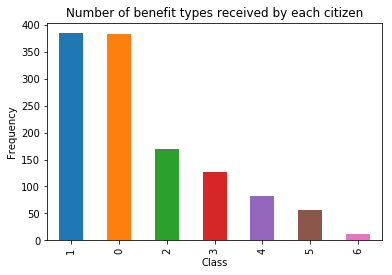

In [25]:
# Number of Benefit Types for each citizen

df3 = df.iloc[:,12:24]

df3['CountUDK'] = df3.sum(axis = 1) 

pd.value_counts(df3['CountUDK']).plot.bar()
plt.title('Number of benefit types received by each citizen')
plt.xlabel('Class')
plt.ylabel('Frequency')  
pd.value_counts(df3['CountUDK'])

In [28]:
######## Chapter 6.2: Data Preparation #########

###      Includes following: 
#        1. Data Type conversions
#        2. Handling Missing Values - 6.2.1 
#        3. Variable Selection - 6.2.1 
#        4. Training/test split - 7.1.2, has to be done before undersampling. 
#        5. Balancing Target Distribution - 6.2.3 
#           5.1 SMOTE 
#           5.2 ADASYN
#           5.3 Under Sampling 

### 1. Data Type conversions: 

# Comvertimg variable types & setting number of decimals: 

# Transform int64 variables to categorical vairables 
df['MPostnr'] = df['MPostnr'].astype('category')
df['MBy'] = df['MBy'].astype('category')
df['AEPostnr'] = df['AEPostnr'].astype('category')
df['AEBy'] = df['AEBy'].astype('category')
df['BPostnr'] = df['BPostnr'].astype('category')
df['BBy'] = df['BBy'].astype('category')
df['B2Postnr'] = df['B2Postnr'].astype('category')
df['B2By'] = df['B2By'].astype('category')
df['B3Postnr'] = df['B3Postnr'].astype('category')
df['B3By'] = df['B3By'].astype('category')
df['Alder']=df['Alder'].astype('category')

# Transform integer variables to floats 
df['IndexKvartal']=df['IndexKvartal'].astype('float64')
df['IndexAar']=df['IndexAar'].astype('float64')
df['offentligeYdelser']=df['offentligeYdelser'].astype('float64')
df['privateIndtaegter']=df['privateIndtaegter'].astype('float64')

# Transform string/character variables to categorical variables 
df['MBy']=df['MBy'].cat.codes
df['AEBy']=df['AEBy'].cat.codes
df['BBy']=df['BBy'].cat.codes
df['B2By']=df['B2By'].cat.codes
df['B3By']=df['B3By'].cat.codes

# Set all cell values in DF to include only two decimals: 
df=df.round(2)

### 2. Handling Missing Values

# Set empty cells ("") to NAN
# df=df.replace(r'^\s*$', np.nan, regex=True)

### 3. Variable Selection 

# Variables being dropped due to correlation 
df=df.drop(['id','AEPostnr','BPostnr','B2Postnr','B3Postnr','MPostnr','IndexKvartal','B3By','B3Alder',
            'B2Alder','UDKTypeEkstraBTilskudEnlig','KTypePensKom','MKommune,,,,'],axis=1)


df=df.replace({'Kÿn': {'Mand':0, 'Kvinde':1}})
df=df.replace({'Alder': {'0 til 9':1,'10 til 19':1, '20 til 29':1, '30 til 39':2, '40 til 49':3, 
                         '50 til 59':4, '60 til 69':5, '70 til 79':5, '80 til 89':5, 
                         '90 til 90':5}})

In [29]:
### 4. Creating training/test split: 

from sklearn.model_selection import train_test_split

x=df.iloc[:,1:]
y=df.iloc[:,0]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state = 2)

print('Number of observations and columns in x train', x_train.shape)
print('Number of observations and columns in y train', y_train.shape)
print('Number of observations and columns in x test' , x_test.shape)
print('Number of observations and columns in y test' , y_test.shape)

Number of observations and columns in x train (727, 34)
Number of observations and columns in y train (727,)
Number of observations and columns in x test (486, 34)
Number of observations and columns in y test (486,)


In [30]:
### 5. Balancing dataset 
# From above it is clear that our distribution is highly skewed - SMOTE:  
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [31]:
## 5.1 SMOTE 
sm=SMOTE(random_state=2)
x_train_smo,y_train_smo=sm.fit_sample(x_train,y_train)

## 5.2 ADASYN
sma=ADASYN(random_state=3)
x_train_ada,y_train_ada=sma.fit_sample(x_train,y_train)

## 5.3 Under Sampling
rus=RandomUnderSampler(random_state=4)
x_train_us,y_train_us=rus.fit_sample(x_train,y_train)
x_test_us,y_test_us=rus.fit_sample(x_test,y_test)

In [32]:
## Converting variables back to Data frames: 
# y_train_smo=pd.DataFrame(y_train_smo)
# y_train_smo =y_train_smo.rename(columns={0: 'Target'})
# 
# y_train_ada=pd.DataFrame(y_train_ada)
# y_train_ada =y_train_ada.rename(columns={0: 'Target'})
# 
# y_train_us=pd.DataFrame(y_train_us)
# y_train_us =y_train_us.rename(columns={0: 'Target'})

x_train_smo=pd.DataFrame(x_train_smo,columns=[x_test])
x_train_ada=pd.DataFrame(x_train_ada,columns=[x_test])
x_train_us=pd.DataFrame(x_train_us,columns=[x_test])
x_test_us=pd.DataFrame(x_test_us,columns=[x_test])

1    675
0    675
dtype: int64

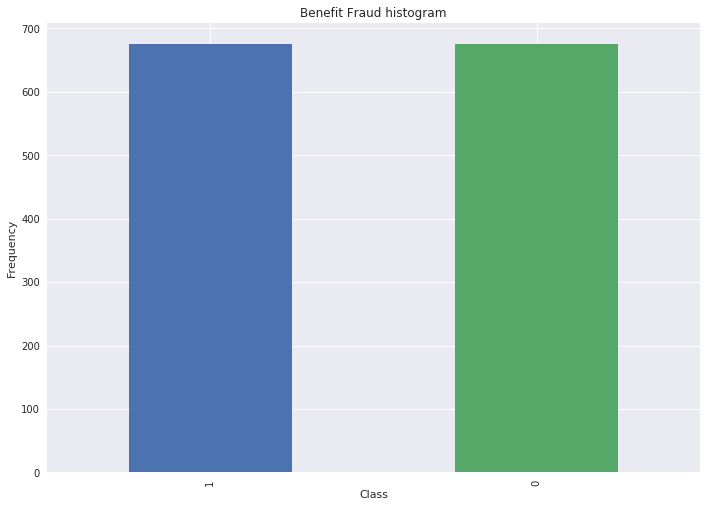

In [13]:
## Plotting Target Distribution af balancing: 
# SMOTE distribution plot  
pd.value_counts(y_train_smo).plot.bar()
plt.title('Benefit Fraud histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')  
pd.value_counts(y_train_smo)

0    675
1    665
dtype: int64

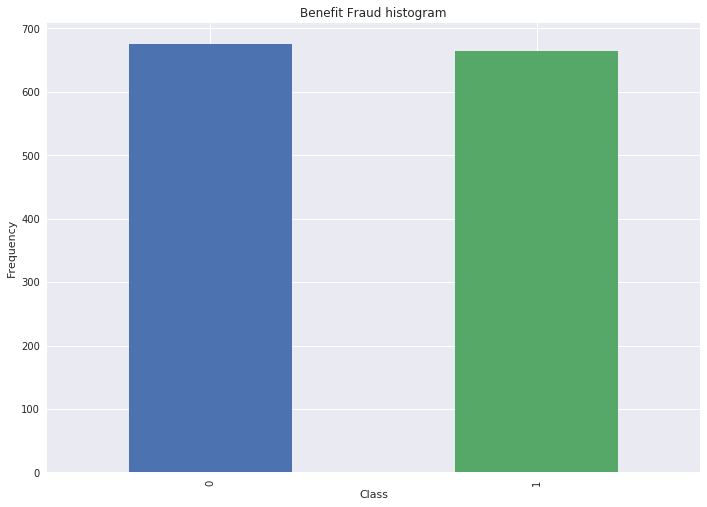

In [14]:
# ADASYN distribution plot
pd.value_counts(y_train_ada).plot.bar()
plt.title('Benefit Fraud histogram')
plt.xlabel('Class')
plt.ylabel('Frequency') 
pd.value_counts(y_train_ada)

1    52
0    52
dtype: int64

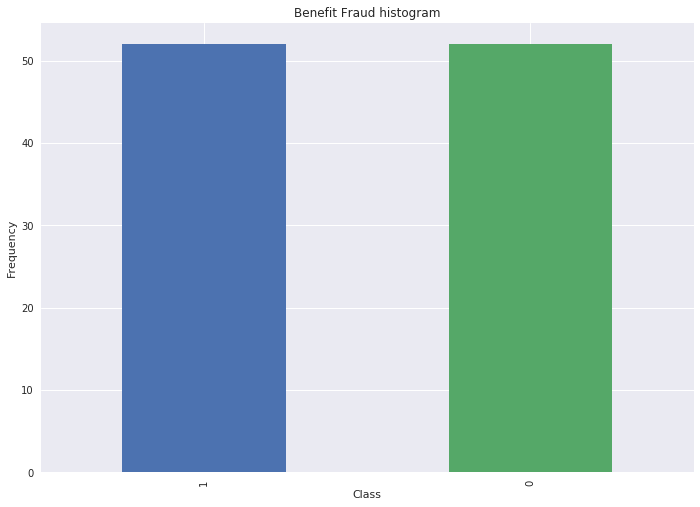

In [15]:
# Undersampling distribution plot - Training data  
pd.value_counts(y_train_us).plot.bar()
plt.title('Benefit Fraud histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
pd.value_counts(y_train_us)

1    24
0    24
dtype: int64

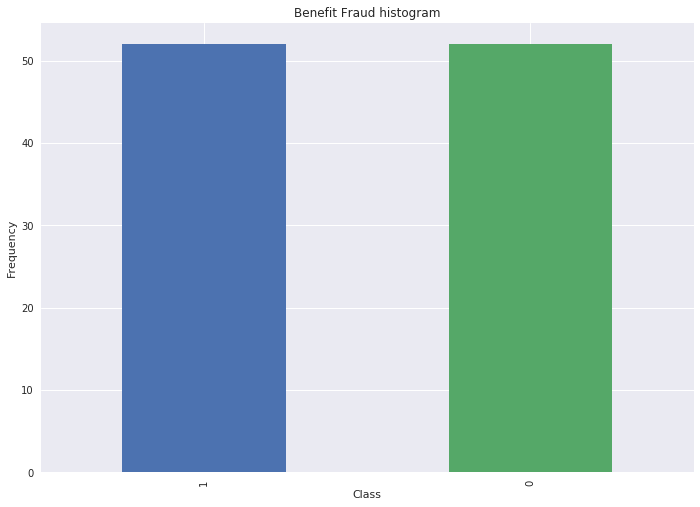

In [16]:
# Undersampling distribution plot - Test data 
pd.value_counts(y_train_us).plot.bar()
plt.title('Benefit Fraud histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
pd.value_counts(y_test_us)

In [17]:
############ Chapter 7.1 & 7.2: Modelling & Evaluation ############

###   Includes following: 
#     1. XGBoost - 7.1.3.2  
#     2. Logistic Regression - 7.1.3.1 
#     3. ADABoost - 7.1.3.2 
#     4. Gradient Boosting - 7.1.3.2 
#     5. Random Forest  - 7.1.3.3 
#     6. Support Vector Machines - 7.1.3.3 


In [22]:
### 1. XGBoost 1st run
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Fitting Models:  
model_smo = XGBClassifier()
model_smo.fit(x_train_smo, y_train_smo, verbose=False)

model_ada = XGBClassifier()
model_ada.fit(x_train_ada, y_train_ada, verbose=False)

model_us = XGBClassifier()
model_us.fit(x_train_us, y_train_us, verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)

In [23]:
# Creating Predictions: 
pred_smo=model_smo.predict(x_test)
print('Accuracy of XGBoost classifier - SMO on test set: {:.3f}'.format(accuracy_score(y_test, pred_smo)))

pred_ada=model_ada.predict(x_test)
print('Accuracy of XGBoost classifier - ADA on test set: {:.3f}'.format(accuracy_score(y_test, pred_ada)))

pred_us=model_us.predict(x_test_us)
print('Accuracy of XGBoost classifier - US on test set: {:.3f}'.format(accuracy_score(y_test_us, pred_us)))

Accuracy of XGBoost classifier - SMO on test set: 0.928
Accuracy of XGBoost classifier - ADA on test set: 0.942
Accuracy of XGBoost classifier - US on test set: 0.521


In [24]:
# Confusion matrices
print('Confusion matrix - XGBoost with Smote:')
print(confusion_matrix(y_test,pred_smo))

print('\n','Confusion matrix - XGBoost with Adasyn:')
print(confusion_matrix(y_test,pred_ada))

print('\n','Confusion matrix - XGBoost with UnderSampling:')
print(confusion_matrix(y_test_us,pred_us))

Confusion matrix - XGBoost with Smote:
[[451  11]
 [ 24   0]]

 Confusion matrix - XGBoost with Adasyn:
[[458   4]
 [ 24   0]]

 Confusion matrix - XGBoost with UnderSampling:
[[13 11]
 [12 12]]


In [25]:
# Accuracy measures: 
from sklearn.metrics import classification_report
print('Performance Measures - XGBoost with Smote:')
print(classification_report(y_test, pred_smo)) 

print('\n','Performance Measures - XGBoost with Adasyn:')
print(classification_report(y_test,pred_ada))

print('\n','Performance Measures - XGBoost with Adasyn:')
print(classification_report(y_test_us,pred_us))

Performance Measures - XGBoost with Smote:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       462
           1       0.00      0.00      0.00        24

    accuracy                           0.93       486
   macro avg       0.47      0.49      0.48       486
weighted avg       0.90      0.93      0.92       486


 Performance Measures - XGBoost with Adasyn:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       462
           1       0.00      0.00      0.00        24

    accuracy                           0.94       486
   macro avg       0.48      0.50      0.49       486
weighted avg       0.90      0.94      0.92       486


 Performance Measures - XGBoost with Adasyn:
              precision    recall  f1-score   support

           0       0.52      0.54      0.53        24
           1       0.52      0.50      0.51        24

    accuracy                           0.52    

ROC/AUC - XGBoost with SMOTE:


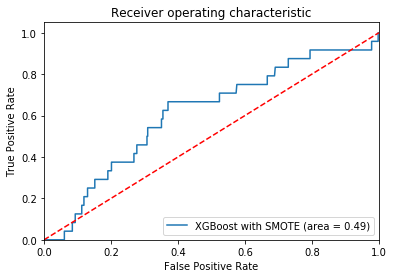

ROC/AUC - XGBoost with ADASYN:


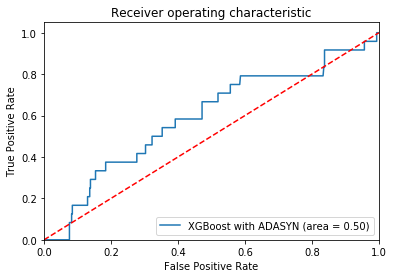

ROC/AUC - XGBoost with US:


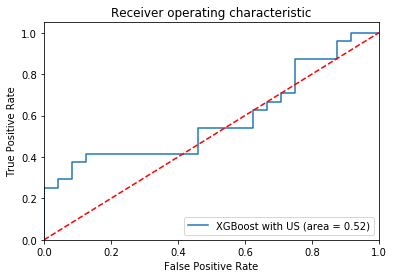

In [26]:
#AUC/ROC curves: 

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

print('ROC/AUC - XGBoost with SMOTE:')
logit_roc_auc = roc_auc_score(y_test, model_smo.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, model_smo.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost with SMOTE (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

print('ROC/AUC - XGBoost with ADASYN:')
logit_roc_auc = roc_auc_score(y_test, model_ada.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, model_ada.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost with ADASYN (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

print('ROC/AUC - XGBoost with US:')
logit_roc_auc = roc_auc_score(y_test_us, model_us.predict(x_test_us))
fpr, tpr, thresholds = roc_curve(y_test_us, model_us.predict_proba(x_test_us)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost with US (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [8]:
### XGBoost - tuning 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from scipy.stats import randint, uniform

seed=11

params_dist_grid = {
    'max_depth': [2,3,4,5,6,7],
    'gamma': [0,0.3,0.5,0.7,1],
    'n_estimators' : randint(1,1001),
    'learning_rate' : [0.05,0.1,0.15,0.2,0.25,0.3],
    'subsample' : uniform(),
    'colsample_bytree': uniform()
}

params_fixed = {
    'objective': 'binary:logistic',
    'silent' : 1
}

In [20]:
### XGBoost SMOTE tuning
model_smo=RandomizedSearchCV(
    estimator=XGBClassifier(**params_fixed,seed=seed),
    param_distributions=params_dist_grid,
    n_iter=500,
    cv=5,
    scoring='roc_auc',
    random_state=11
)

model_smo.fit(x_train_smo,y_train_smo)

print(model_smo.best_score_)
print(model_smo.best_estimator_)
print(model_smo.best_params_)

0.9891742112482852
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=0.9793804270566723, gamma=0, learning_rate=0.15,
              max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
              n_estimators=748, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=11, silent=1,
              subsample=0.9155030040986599)
{'colsample_bytree': 0.9793804270566723, 'gamma': 0, 'learning_rate': 0.15, 'max_depth': 5, 'n_estimators': 748, 'subsample': 0.9155030040986599}


In [15]:
### XGBoost ADASYN tuning
model_ada=RandomizedSearchCV(
    estimator=XGBClassifier(**params_fixed,seed=seed),
    param_distributions=params_dist_grid,
    n_iter=500,
    cv=5,
    scoring='roc_auc',
    random_state=11
)

model_ada.fit(x_train_ada,y_train_ada)

print(model_ada.best_score_)
print(model_ada.best_estimator_)
print(model_ada.best_params_)

0.9864383180172652
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=0.9423759623025942, gamma=0, learning_rate=0.2,
              max_delta_step=0, max_depth=7, min_child_weight=1, missing=None,
              n_estimators=589, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=11, silent=1,
              subsample=0.5345600347632751)
{'colsample_bytree': 0.9423759623025942, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 589, 'subsample': 0.5345600347632751}


In [16]:
### XGBoost UnderSampling tuning
model_us=RandomizedSearchCV(
    estimator=XGBClassifier(**params_fixed,seed=seed),
    param_distributions=params_dist_grid,
    n_iter=100,
    cv=5,
    scoring='roc_auc',
    random_state=11
)

model_us.fit(x_train_us,y_train_us)

print(model_us.best_score_)
print(model_us.best_estimator_)
print(model_us.best_params_)

0.588986013986014
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=0.11052348479139329, gamma=0.7,
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=179, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=11, silent=1,
              subsample=0.4283188860114776)
{'colsample_bytree': 0.11052348479139329, 'gamma': 0.7, 'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 179, 'subsample': 0.4283188860114776}


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [17]:
### 1. XGBoost tuned models (best models)
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Fitting Models:  
model_smo = XGBClassifier(colsample_bytree = 0.8246565232675136, gamma = 0, learning_rate = 0.1, max_depth = 4, n_estimators = 712, subsample = 0.35963375614351045)
model_smo.fit(x_train_smo, y_train_smo, verbose=False)

model_ada = XGBClassifier(colsample_bytree = 0.9423759623025942, gamma = 0, learning_rate = 0.2, max_depth = 7, n_estimators = 589, subsample = 0.5345600347632751)
model_ada.fit(x_train_ada, y_train_ada, verbose=False)

model_us = XGBClassifier(colsample_bytree = 0.11052348479139329, gamma = 0.7, learning_rate = 0.3, max_depth = 6, n_estimators = 179, subsample = 0.4283188860114776)
model_us.fit(x_train_us, y_train_us, verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=0.11052348479139329, gamma=0.7,
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=179, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=0.4283188860114776)

In [18]:
# Creating Predictions: 
pred_smo=model_smo.predict(x_test)
print('Accuracy of XGBoost classifier - SMO on test set: {:.3f}'.format(accuracy_score(y_test, pred_smo)))

pred_ada=model_ada.predict(x_test)
print('Accuracy of XGBoost classifier - ADA on test set: {:.3f}'.format(accuracy_score(y_test, pred_ada)))

pred_us=model_us.predict(x_test_us)
print('Accuracy of XGBoost classifier - US on test set: {:.3f}'.format(accuracy_score(y_test_us, pred_us)))

Accuracy of XGBoost classifier - SMO on test set: 0.930
Accuracy of XGBoost classifier - ADA on test set: 0.934
Accuracy of XGBoost classifier - US on test set: 0.521


In [19]:
# Confusion matrices
print('Confusion matrix - XGBoost with Smote:')
print(confusion_matrix(y_test,pred_smo))

print('\n','Confusion matrix - XGBoost with Adasyn:')
print(confusion_matrix(y_test,pred_ada))

print('\n','Confusion matrix - XGBoost with UnderSampling:')
print(confusion_matrix(y_test_us,pred_us))

Confusion matrix - XGBoost with Smote:
[[452  10]
 [ 24   0]]

 Confusion matrix - XGBoost with Adasyn:
[[453   9]
 [ 23   1]]

 Confusion matrix - XGBoost with UnderSampling:
[[13 11]
 [12 12]]


In [20]:
# Accuracy measures: 
from sklearn.metrics import classification_report
print('Performance Measures - XGBoost with Smote:')
print(classification_report(y_test, pred_smo)) 

print('\n','Performance Measures - XGBoost with Adasyn:')
print(classification_report(y_test,pred_ada))

print('\n','Performance Measures - XGBoost with Adasyn:')
print(classification_report(y_test_us,pred_us))

Performance Measures - XGBoost with Smote:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       462
           1       0.00      0.00      0.00        24

    accuracy                           0.93       486
   macro avg       0.47      0.49      0.48       486
weighted avg       0.90      0.93      0.92       486


 Performance Measures - XGBoost with Adasyn:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       462
           1       0.10      0.04      0.06        24

    accuracy                           0.93       486
   macro avg       0.53      0.51      0.51       486
weighted avg       0.91      0.93      0.92       486


 Performance Measures - XGBoost with Adasyn:
              precision    recall  f1-score   support

           0       0.52      0.54      0.53        24
           1       0.52      0.50      0.51        24

    accuracy                           0.52    

ROC/AUC - XGBoost with SMOTE:


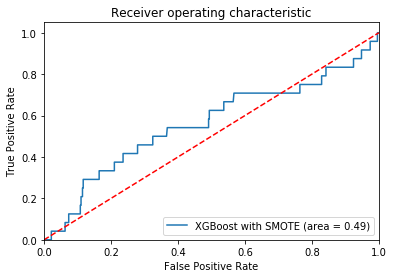

ROC/AUC - XGBoost with ADASYN:


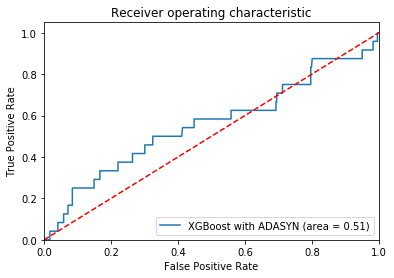

ROC/AUC - XGBoost with US:


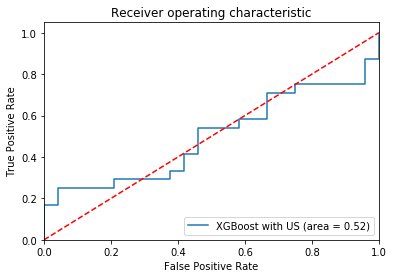

In [21]:
#AUC/ROC curves: 

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

print('ROC/AUC - XGBoost with SMOTE:')
logit_roc_auc = roc_auc_score(y_test, model_smo.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, model_smo.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost with SMOTE (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

print('ROC/AUC - XGBoost with ADASYN:')
logit_roc_auc = roc_auc_score(y_test, model_ada.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, model_ada.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost with ADASYN (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

print('ROC/AUC - XGBoost with US:')
logit_roc_auc = roc_auc_score(y_test_us, model_us.predict(x_test_us))
fpr, tpr, thresholds = roc_curve(y_test_us, model_us.predict_proba(x_test_us)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost with US (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

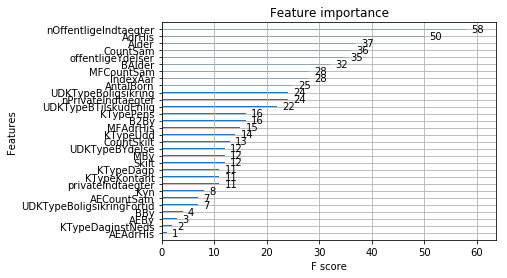

In [31]:
#Feature importances - SMO:  
from matplotlib import pyplot
from xgboost import plot_importance

plot_importance(model_smo)
pyplot.show()

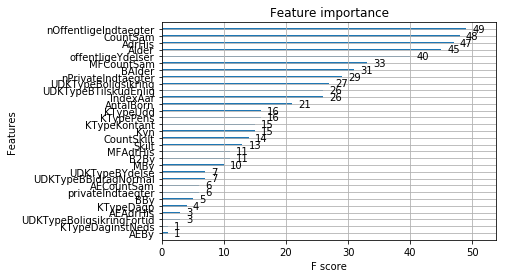

In [32]:
#Feature importances - ADA:  
from matplotlib import pyplot
from xgboost import plot_importance

plot_importance(model_ada)
pyplot.show()

In [33]:
### 2. Logistic Regression 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Fitting Models:  
log_smo = LogisticRegression(solver='liblinear',penalty='l1',max_iter=4000, random_state=42)
log_smo.fit(x_train_smo, y_train_smo)
   
log_ada = LogisticRegression(solver='liblinear',penalty='l1',max_iter=4000, random_state=42)
log_ada.fit(x_train_ada, y_train_ada)

log_us = LogisticRegression(solver='liblinear',penalty='l1',max_iter=4000, random_state=42)
log_us.fit(x_train_us, y_train_us) 


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=4000,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
# Creating Predictions: 
y_pred_smo = log_smo.predict(x_test)
print('Accuracy of logistic regression classifier - SMO on test set: {:.3f}'.format(accuracy_score(y_test, y_pred_smo)))

y_pred_ada = log_ada.predict(x_test)
print('Accuracy of logistic regression classifier - ADA on test set: {:.3f}'.format(accuracy_score(y_test, y_pred_ada)))

y_pred_us = log_us.predict(x_test_us)
print('Accuracy of logistic regression classifier - US on test set: {:.3f}'.format(accuracy_score(y_test_us, y_pred_us)))

Accuracy of logistic regression classifier - SMO on test set: 0.693
Accuracy of logistic regression classifier - ADA on test set: 0.700
Accuracy of logistic regression classifier - US on test set: 0.458


In [35]:
# Confusion matrices
print('Confusion matrix - Logistic Regression with Smote:')
print(confusion_matrix(y_test, y_pred_smo))

print('\n','Confusion matrix - Logistic Regression with Adasyn:')
print(confusion_matrix(y_test, y_pred_ada))

print('\n','Confusion matrix - Logistic Regression with UnderSampling:')
print(confusion_matrix(y_test_us, y_pred_us))


Confusion matrix - Logistic Regression with Smote:
[[326 136]
 [ 13  11]]

 Confusion matrix - Logistic Regression with Adasyn:
[[328 134]
 [ 12  12]]

 Confusion matrix - Logistic Regression with UnderSampling:
[[ 9 15]
 [11 13]]


In [36]:
# Accuracy measures: 
from sklearn.metrics import classification_report
print('Performance Measures - Logistic Regression with Smote:')
print(classification_report(y_test, y_pred_smo)) 

print('\n','Performance Measures - Logistic Regression with Adasyn:')
print(classification_report(y_test,y_pred_ada))

print('\n','Performance Measures - Logistic Regression with US:')
print(classification_report(y_test_us,y_pred_us))


Performance Measures - Logistic Regression with Smote:
              precision    recall  f1-score   support

           0       0.96      0.71      0.81       462
           1       0.07      0.46      0.13        24

    accuracy                           0.69       486
   macro avg       0.52      0.58      0.47       486
weighted avg       0.92      0.69      0.78       486


 Performance Measures - Logistic Regression with Adasyn:
              precision    recall  f1-score   support

           0       0.96      0.71      0.82       462
           1       0.08      0.50      0.14        24

    accuracy                           0.70       486
   macro avg       0.52      0.60      0.48       486
weighted avg       0.92      0.70      0.78       486


 Performance Measures - Logistic Regression with US:
              precision    recall  f1-score   support

           0       0.45      0.38      0.41        24
           1       0.46      0.54      0.50        24

    accuracy   

Logistic Regression with SMOTE:


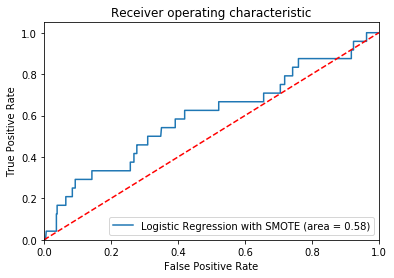

Logistic Regression with ADASYN:


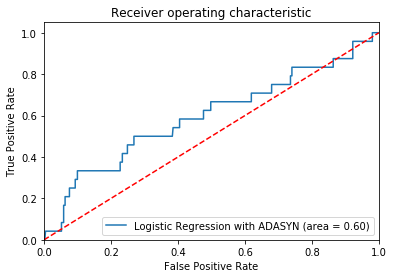

Logistic Regression with US:


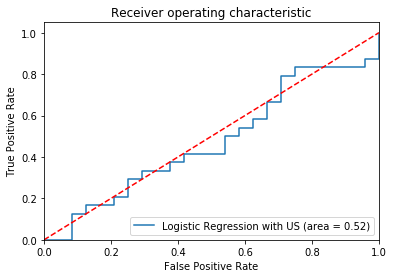

In [37]:
#AUC/ROC curves: 

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

print('Logistic Regression with SMOTE:')
logit_roc_auc = roc_auc_score(y_test, log_smo.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, log_smo.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression with SMOTE (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

print('Logistic Regression with ADASYN:')
logit_roc_auc = roc_auc_score(y_test, log_ada.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, log_ada.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression with ADASYN (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

print('Logistic Regression with US:')
logit_roc_auc = roc_auc_score(y_test_us, model_us.predict(x_test_us))
fpr, tpr, thresholds = roc_curve(y_test_us, log_us.predict_proba(x_test_us)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression with US (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [38]:
#Parameter tuning (C)

from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV
logistic = linear_model.LogisticRegression(solver = 'liblinear', random_state=42)

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

clf_smo = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0, scoring='roc_auc')
clf_ada = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0, scoring='roc_auc')
clf_us = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0, scoring='roc_auc')

In [39]:
best_model_smo = clf_smo.fit(x_train_smo, y_train_smo)
best_model_ada = clf_ada.fit(x_train_ada, y_train_ada)
best_model_us = clf_us.fit(x_train_us, y_train_us)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [40]:
print('Best Penalty - SMO:', best_model_smo.best_estimator_.get_params()['penalty'])
print('Best C - SMO:', best_model_smo.best_estimator_.get_params()['C'])

print('Best Penalty - ADA:', best_model_ada.best_estimator_.get_params()['penalty'])
print('Best C - ADA:', best_model_ada.best_estimator_.get_params()['C'])

print('Best Penalty - US:', best_model_us.best_estimator_.get_params()['penalty'])
print('Best C - US:', best_model_us.best_estimator_.get_params()['C'])

Best Penalty - SMO: l2
Best C - SMO: 2.7825594022071245
Best Penalty - ADA: l1
Best C - ADA: 1.0
Best Penalty - US: l1
Best C - US: 2.7825594022071245


In [41]:
pred_smo = best_model_smo.predict(x_test)
print('Accuracy of logistic regression classifier - SMO on test set: {:.3f}'.format(accuracy_score(y_test, pred_smo)))

pred_ada = best_model_ada.predict(x_test)
print('Accuracy of logistic regression classifier - ADA on test set: {:.3f}'.format(accuracy_score(y_test, pred_ada)))

pred_us = best_model_us.predict(x_test_us)
print('Accuracy of logistic regression classifier - US on test set: {:.3f}'.format(accuracy_score(y_test_us, pred_us)))

Accuracy of logistic regression classifier - SMO on test set: 0.685
Accuracy of logistic regression classifier - ADA on test set: 0.700
Accuracy of logistic regression classifier - US on test set: 0.479


In [42]:
# Confusion matrices
print('Confusion matrix - Logistic Regression with Smote:')
print(confusion_matrix(y_test, pred_smo))

print('\n','Confusion matrix - Logistic Regression with Adasyn:')
print(confusion_matrix(y_test, pred_ada))

print('\n','Confusion matrix - Logistic Regression with UnderSampling:')
print(confusion_matrix(y_test_us, pred_us))

Confusion matrix - Logistic Regression with Smote:
[[321 141]
 [ 12  12]]

 Confusion matrix - Logistic Regression with Adasyn:
[[328 134]
 [ 12  12]]

 Confusion matrix - Logistic Regression with UnderSampling:
[[ 9 15]
 [10 14]]


In [43]:
# Accuracy measures: 
from sklearn.metrics import classification_report
print('Performance Measures - Logistic Regression with Smote:')
print(classification_report(y_test, pred_smo)) 

print('\n','Performance Measures - Logistic Regression with Adasyn:')
print(classification_report(y_test,pred_ada))

print('\n','Performance Measures - Logistic Regression with US:')
print(classification_report(y_test_us,pred_us))

Performance Measures - Logistic Regression with Smote:
              precision    recall  f1-score   support

           0       0.96      0.69      0.81       462
           1       0.08      0.50      0.14        24

    accuracy                           0.69       486
   macro avg       0.52      0.60      0.47       486
weighted avg       0.92      0.69      0.77       486


 Performance Measures - Logistic Regression with Adasyn:
              precision    recall  f1-score   support

           0       0.96      0.71      0.82       462
           1       0.08      0.50      0.14        24

    accuracy                           0.70       486
   macro avg       0.52      0.60      0.48       486
weighted avg       0.92      0.70      0.78       486


 Performance Measures - Logistic Regression with US:
              precision    recall  f1-score   support

           0       0.47      0.38      0.42        24
           1       0.48      0.58      0.53        24

    accuracy   

Logistic Regression with SMOTE:


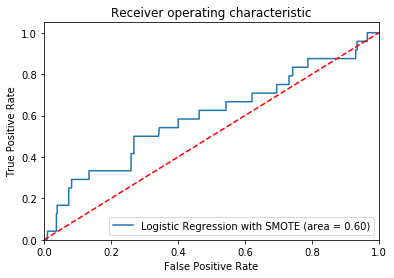

Logistic Regression with ADASYN:


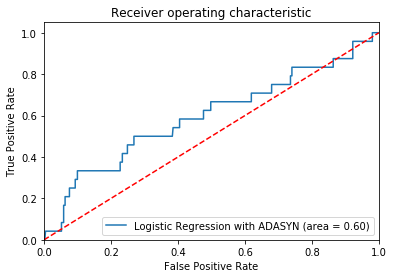

Logistic Regression with US:


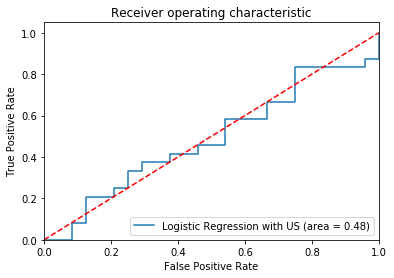

In [44]:
#AUC/ROC curves: 

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

print('Logistic Regression with SMOTE:')
logit_roc_auc = roc_auc_score(y_test, best_model_smo.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, best_model_smo.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression with SMOTE (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

print('Logistic Regression with ADASYN:')
logit_roc_auc = roc_auc_score(y_test, best_model_ada.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, best_model_ada.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression with ADASYN (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

print('Logistic Regression with US:')
logit_roc_auc = roc_auc_score(y_test_us, best_model_us.predict(x_test_us))
fpr, tpr, thresholds = roc_curve(y_test_us, best_model_us.predict_proba(x_test_us)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression with US (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

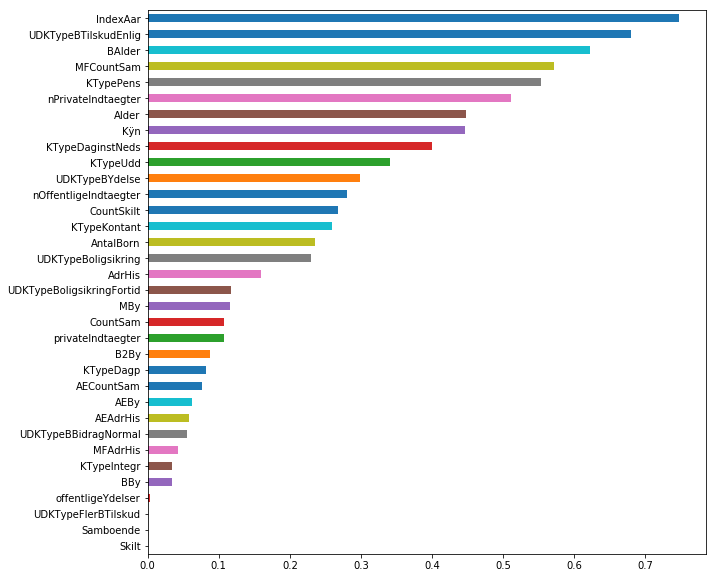

In [35]:
#Feature importance SMOTE
X=np.array(x_train_smo)
score=np.std(X, 0)*log_smo.coef_
score=np.abs(score)
score=score.ravel()
y= np.array(list(x_train_smo))
y=y.ravel()
z=pd.Series(score,index=y)
z=z.sort_values()
z.plot('barh',figsize=(10,10))

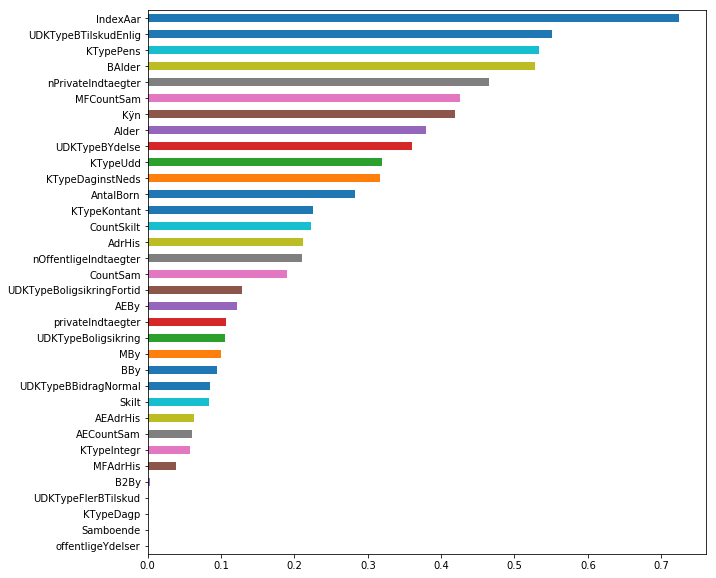

In [36]:
#Feature importance ADASYN
X=np.array(x_train_ada)
score=np.std(X, 0)*log_ada.coef_
score=np.abs(score)
score=score.ravel()
y= np.array(list(x_train_ada))
y=y.ravel()
z=pd.Series(score,index=y)
z=z.sort_values()
z.plot('barh',figsize=(10,10))

In [45]:
### 3. ADABoost

# Adaboost: 

# Fitting Models & creating predictions: 
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier

clf_smo = AdaBoostClassifier(n_estimators=100)
ada_smo = clf_smo.fit(x_train_smo,y_train_smo)
ada_pred_smo = ada_smo.predict(x_test)
print('Accuracy of ADABoost classifier - SMO on test set: {:.2f}'.format(ada_smo.score(x_test, y_test)))

clf_ada = AdaBoostClassifier(n_estimators=100)
ada_ada = clf_ada.fit(x_train_ada,y_train_ada)
ada_pred_ada = ada_ada.predict(x_test)
print('Accuracy of ADABoost classifier - ADA on test set: {:.2f}'.format(ada_ada.score(x_test, y_test)))

clf_us = AdaBoostClassifier(n_estimators=100)
ada_us = clf_us.fit(x_train_us,y_train_us)
ada_pred_us = ada_us.predict(x_test_us)
print('Accuracy of ADABoost classifier - US on test set: {:.2f}'.format(ada_ada.score(x_test_us, y_test_us)))

Accuracy of ADABoost classifier - SMO on test set: 0.92
Accuracy of ADABoost classifier - ADA on test set: 0.90
Accuracy of ADABoost classifier - US on test set: 0.54


In [46]:
# Confusion matrices
print('Confusion matrix - ADABoost with Smote:')
print(confusion_matrix(y_test, ada_pred_smo))

print('\n','Confusion matrix - ADABoost with Adasyn:')
print(confusion_matrix(y_test, ada_pred_ada))

print('\n','Confusion matrix - ADABoost with UnderSampling:')
print(confusion_matrix(y_test_us, ada_pred_us))

Confusion matrix - ADABoost with Smote:
[[442  20]
 [ 21   3]]

 Confusion matrix - ADABoost with Adasyn:
[[437  25]
 [ 22   2]]

 Confusion matrix - ADABoost with UnderSampling:
[[16  8]
 [ 9 15]]


In [47]:
# Accuracy measures: 
from sklearn.metrics import classification_report
print('Performance Measures - ADABoost with Smote:')
print(classification_report(y_test, ada_pred_smo)) 

print('\n','Performance Measures - ADABoost with Adasyn:')
print(classification_report(y_test,ada_pred_ada))

print('\n','Performance Measures - ADABoost with Adasyn:')
print(classification_report(y_test_us,ada_pred_us))

Performance Measures - ADABoost with Smote:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       462
           1       0.13      0.12      0.13        24

    accuracy                           0.92       486
   macro avg       0.54      0.54      0.54       486
weighted avg       0.91      0.92      0.91       486


 Performance Measures - ADABoost with Adasyn:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       462
           1       0.07      0.08      0.08        24

    accuracy                           0.90       486
   macro avg       0.51      0.51      0.51       486
weighted avg       0.91      0.90      0.91       486


 Performance Measures - ADABoost with Adasyn:
              precision    recall  f1-score   support

           0       0.64      0.67      0.65        24
           1       0.65      0.62      0.64        24

    accuracy                           0.65 

ADABoost with SMOTE :


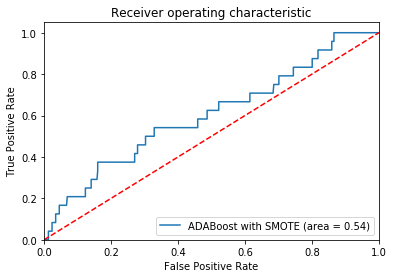

ADABoost with ADASYN:


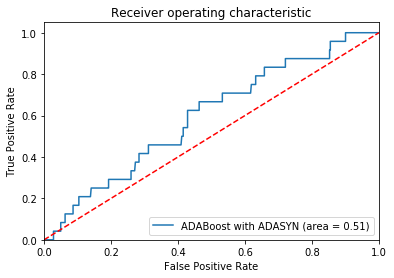

ADABoost with US:


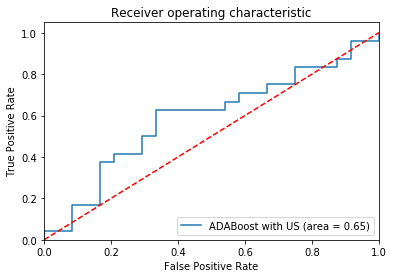

In [48]:
#AUC/ROC curves: 

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

print('ADABoost with SMOTE :')
logit_roc_auc = roc_auc_score(y_test, ada_smo.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, ada_smo.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='ADABoost with SMOTE (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

print('ADABoost with ADASYN:')
logit_roc_auc = roc_auc_score(y_test, ada_ada.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, ada_ada.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='ADABoost with ADASYN (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

print('ADABoost with US:')
logit_roc_auc = roc_auc_score(y_test_us, ada_us.predict(x_test_us))
fpr, tpr, thresholds = roc_curve(y_test_us, ada_us.predict_proba(x_test_us)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='ADABoost with US (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()